In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau

## Forest

In [3]:
#
algo = "forest"
dataset = "spiral"

# Read
df = pd.read_csv(f'./results/{dataset}/{dataset}_{algo}_results.csv')

# Define headers
train_error = 'train_mse'
test_error = 'test_mse'

# Set to floats
df.loc[df['max_depth'] == 'None', 'max_depth'] = '32' # set max depth
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]
df['frac_activated'] = df['n_regions'] / df['n_train_samples']

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
#     as_index=False
# ).mean()

df.head(5)

model  rep  n_train_samples  n_test_samples  n_estimators  bootstrap  \
0  forest  0.0           4096.0          8192.0           1.0        0.0   
1  forest  0.0           4096.0          8192.0           1.0        0.0   
2  forest  0.0           4096.0          8192.0           1.0        0.0   
3  forest  0.0           4096.0          8192.0           1.0        0.0   
4  forest  0.0           4096.0          8192.0           1.0        0.0   

   max_depth  n_jobs  train_mse  test_mse  ...  IRM_h*  ACTS_h*       entropy  \
0        2.0    -1.0   0.238136  0.238319  ...     3.0      3.0  70816.254141   
1        3.0    -1.0   0.220506  0.220860  ...     5.0      5.0  67694.385726   
2        4.0    -1.0   0.208708  0.211164  ...     8.0      8.0  65966.170260   
3        6.0    -1.0   0.175430  0.180243  ...    19.0     19.0  62212.895562   
4        8.0    -1.0   0.096938  0.103309  ...    43.0     43.0  52756.432770   

   rows_mean_L1  rows_mean_L2  cols_mean_L1  cols_mean_L2  n_total_leaves  \
0           1.0      0.907599   2730.666667     30.169889             3.0   
1           1.0      0.800488   1638.400000     18.101934             5.0   
2           1.0      0.754997   1024.000000     11.313708             8.0   
3           1.0      0.655607    431.157895      4.763667            19.0   
4           1.0      0.358561    190.511628      2.104876            43.0   

   generalization_gap  frac_activated  
0            0.000183        0.000732  
1            0.000355        0.001221  
2            0.002456        0.001953  
3            0.004813        0.004639  
4            0.006371        0.010498  

[5 rows x 24 columns]

In [4]:
corr_vars = [
    'generalization_gap',
    'n_total_leaves', 'max_depth', 'n_estimators',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L1', 'rows_mean_L2', 'cols_mean_L1', 'cols_mean_L2',
]
corr_df = df[corr_vars].corr('kendall')
display(corr_df)
# corr_df.to_csv('./results/rf_spearman_corrs.csv')

generalization_gap  n_total_leaves  max_depth  \
generalization_gap            1.000000        0.403512   0.694382   
n_total_leaves                0.403512        1.000000   0.655144   
max_depth                     0.694382        0.655144   1.000000   
n_estimators                 -0.192585        0.385196  -0.006455   
IRM_L1                       -0.182969        0.370862  -0.004029   
IRM_L2                       -0.568076       -0.081106  -0.462778   
n_regions                     0.441556        0.895670   0.705350   
ACTS_L2                      -0.451617       -0.843355  -0.719114   
IRM_h*                        0.502754        0.874425   0.776728   
ACTS_h*                       0.441556        0.895670   0.705350   
entropy                      -0.314463        0.191699  -0.171473   
rows_mean_L1                 -0.192585        0.385196  -0.006455   
rows_mean_L2                 -0.662092       -0.224980  -0.614960   
cols_mean_L1                 -0.677595       -0.653971  -0.900093   
cols_mean_L2                 -0.677595       -0.653971  -0.900093   

                    n_estimators    IRM_L1    IRM_L2  n_regions   ACTS_L2  \
generalization_gap     -0.192585 -0.182969 -0.568076   0.441556 -0.451617   
n_total_leaves          0.385196  0.370862 -0.081106   0.895670 -0.843355   
max_depth              -0.006455 -0.004029 -0.462778   0.705350 -0.719114   
n_estimators            1.000000  0.954219  0.587191   0.319978 -0.291907   
IRM_L1                  0.954219  1.000000  0.557667   0.309121 -0.281528   
IRM_L2                  0.587191  0.557667  1.000000  -0.145010  0.176443   
n_regions               0.319978  0.309121 -0.145010   1.000000 -0.919813   
ACTS_L2                -0.291907 -0.281528  0.176443  -0.919813  1.000000   
IRM_h*                  0.253749  0.244734 -0.206628   0.923879 -0.900220   
ACTS_h*                 0.319978  0.309121 -0.145010   1.000000 -0.919813   
entropy                 0.886603  0.843226  0.715604   0.128159 -0.102915   
rows_mean_L1            1.000000  0.954219  0.587191   0.319978 -0.291907   
rows_mean_L2            0.433269  0.410743  0.849587  -0.285159  0.313459   
cols_mean_L1           -0.010350 -0.013176  0.428333  -0.699128  0.705984   
cols_mean_L2           -0.010350 -0.013176  0.428333  -0.699128  0.705984   

                      IRM_h*   ACTS_h*   entropy  rows_mean_L1  rows_mean_L2  \
generalization_gap  0.502754  0.441556 -0.314463     -0.192585     -0.662092   
n_total_leaves      0.874425  0.895670  0.191699      0.385196     -0.224980   
max_depth           0.776728  0.705350 -0.171473     -0.006455     -0.614960   
n_estimators        0.253749  0.319978  0.886603      1.000000      0.433269   
IRM_L1              0.244734  0.309121  0.843226      0.954219      0.410743   
IRM_L2             -0.206628 -0.145010  0.715604      0.587191      0.849587   
n_regions           0.923879  1.000000  0.128159      0.319978     -0.285159   
ACTS_L2            -0.900220 -0.919813 -0.102915     -0.291907      0.313459   
IRM_h*              1.000000  0.923879  0.066672      0.253749     -0.348710   
ACTS_h*             0.923879  1.000000  0.128159      0.319978     -0.285159   
entropy             0.066672  0.128159  1.000000      0.886603      0.569145   
rows_mean_L1        0.253749  0.319978  0.886603      1.000000      0.433269   
rows_mean_L2       -0.348710 -0.285159  0.569145      0.433269      1.000000   
cols_mean_L1       -0.769220 -0.699128  0.155661     -0.010350      0.571904   
cols_mean_L2       -0.769220 -0.699128  0.155661     -0.010350      0.571904   

                    cols_mean_L1  cols_mean_L2  
generalization_gap     -0.677595     -0.677595  
n_total_leaves         -0.653971     -0.653971  
max_depth              -0.900093     -0.900093  
n_estimators           -0.010350     -0.010350  
IRM_L1                 -0.013176     -0.013176  
IRM_L2                  0.428333      0.428333  
n_regions              -0.699128     -0.699128  
ACTS_L2  

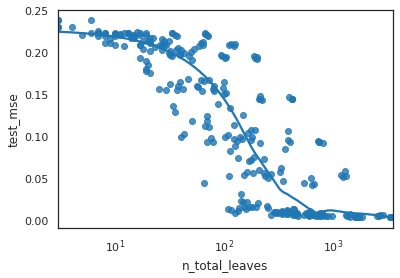

In [5]:
sns.set_style('white')
sns.set_context('notebook')
sns.regplot(data=df, x='n_total_leaves', y=test_error, lowess=True)
plt.xscale('log')
plt.show()

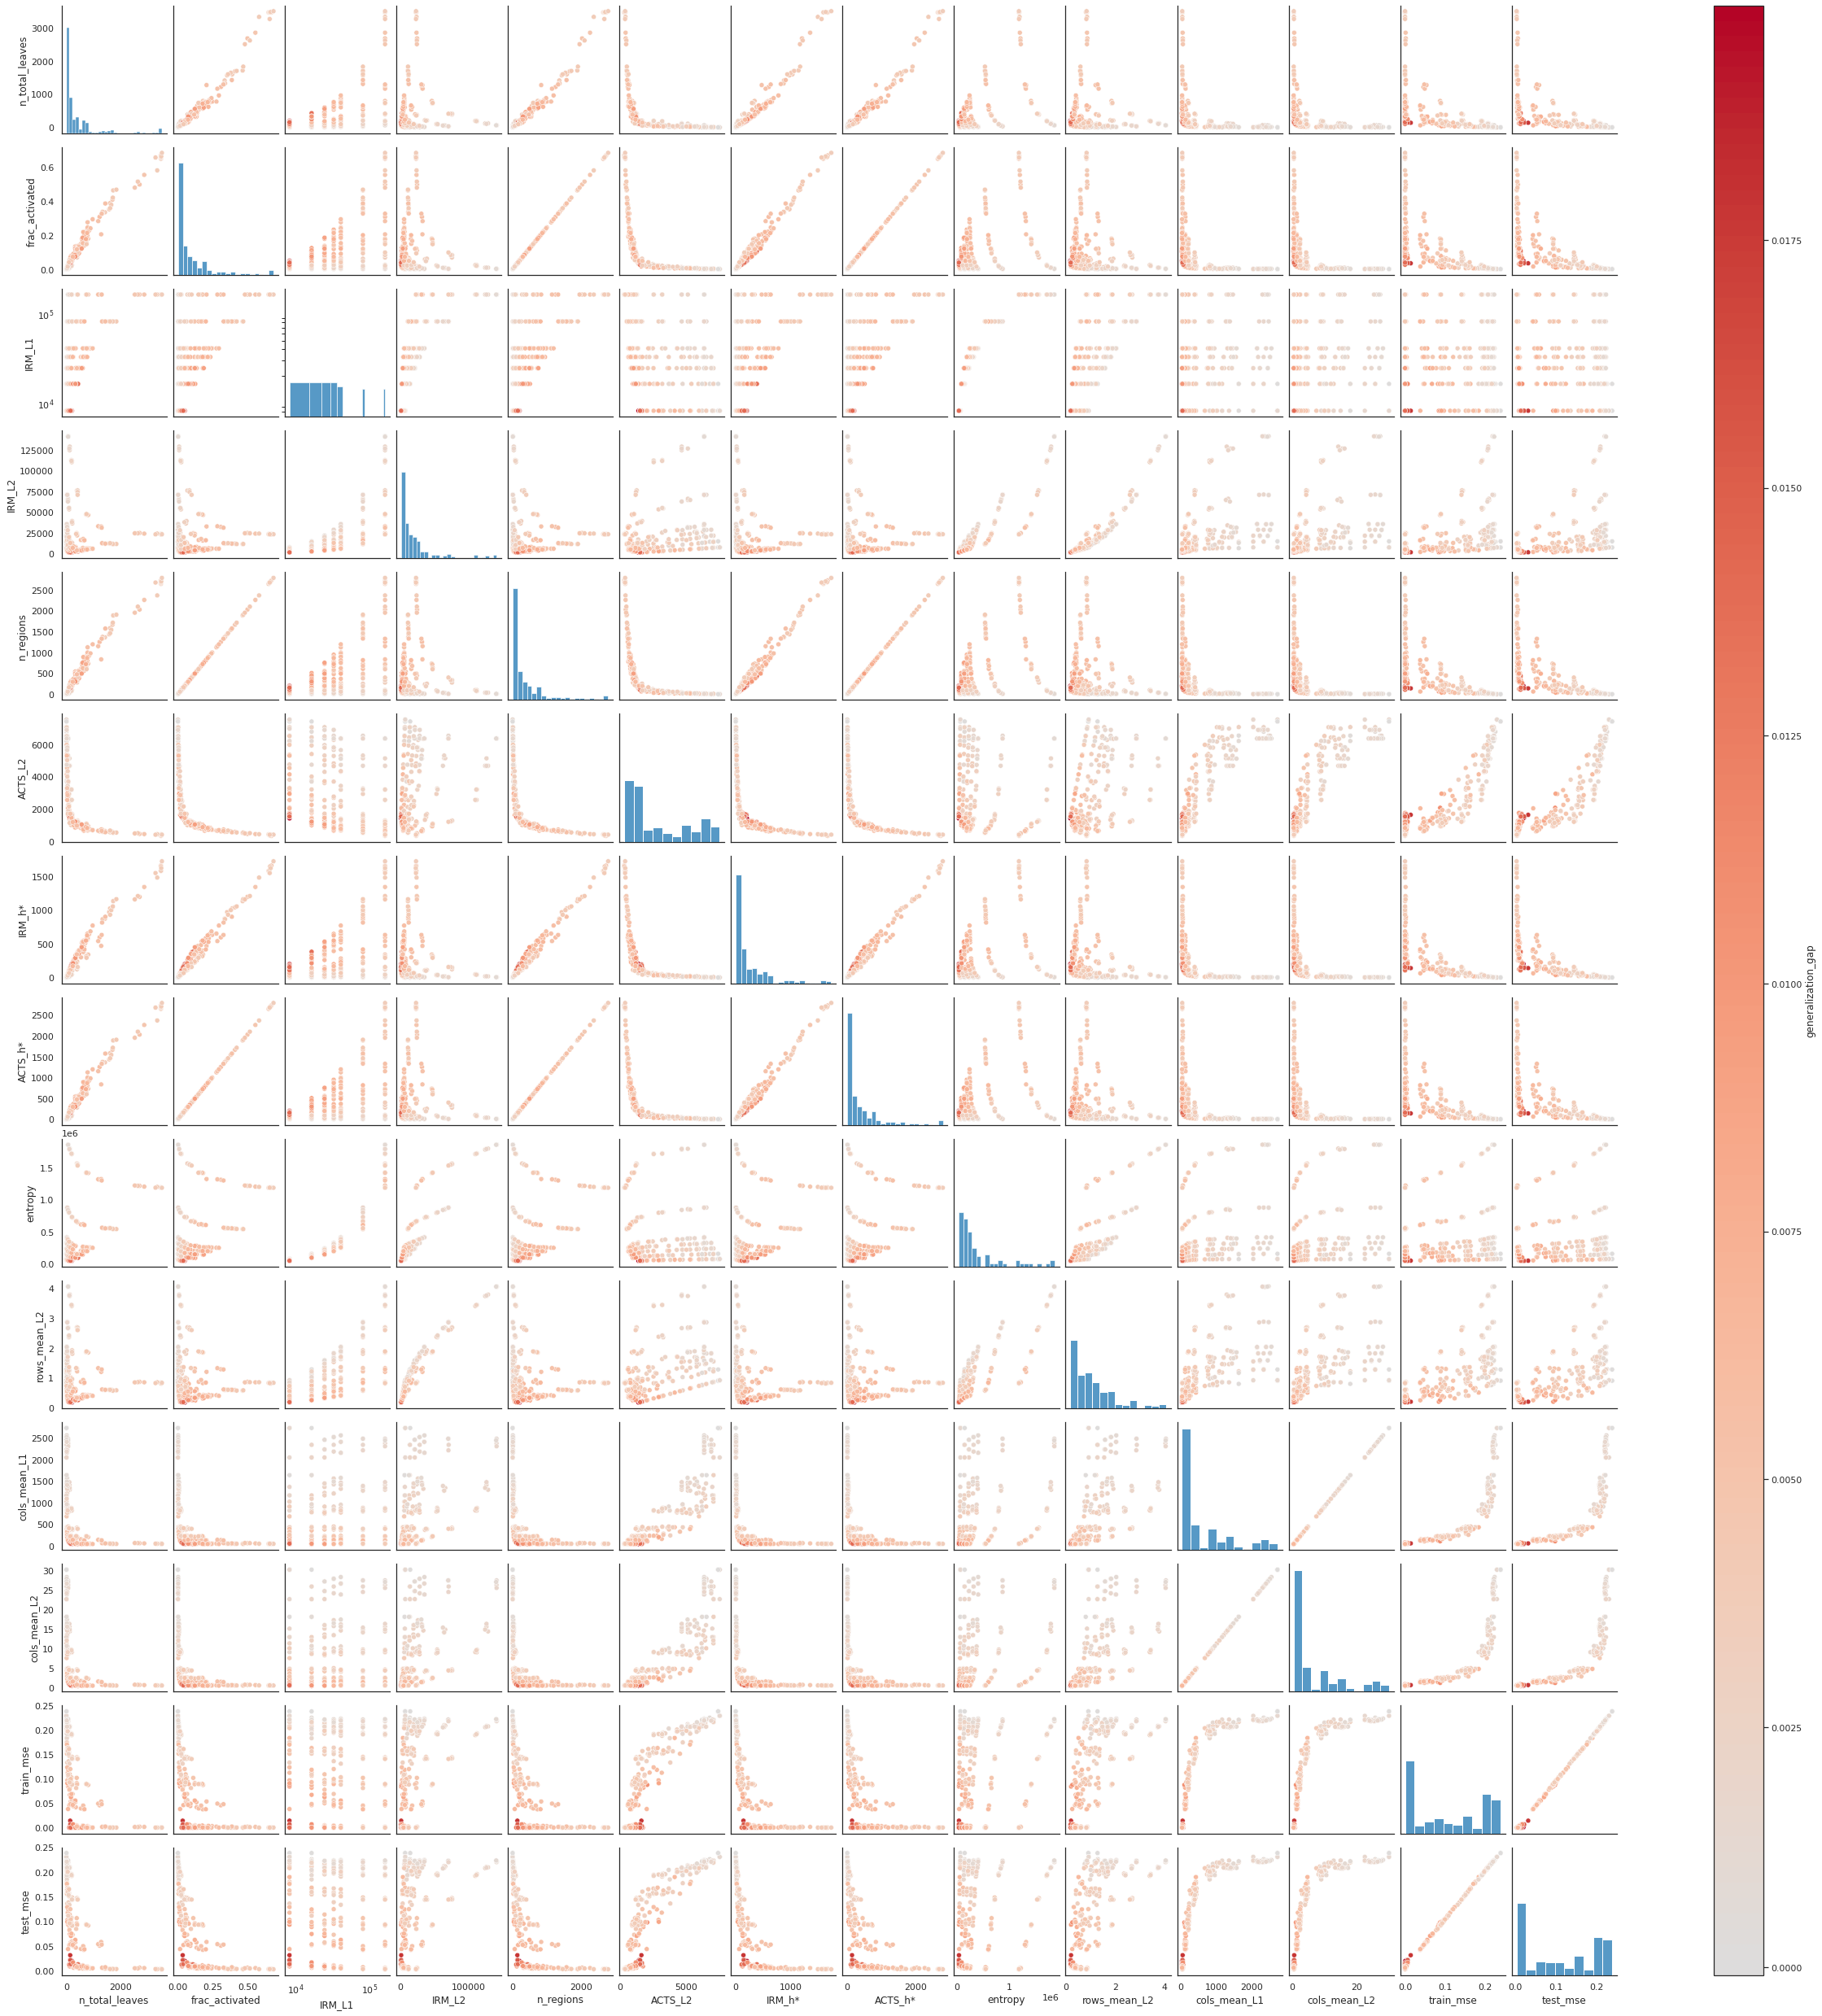

In [8]:
sns.set_context('notebook')
hue = 'generalization_gap'
variables = [
    # 'n_estimators', 'max_depth',
    'n_total_leaves', 'frac_activated',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    # 'rows_mean_L1',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
    train_error, test_error
]
g = continuous_pairplot(
    df, vars=variables,
    hue=hue,
)
g.axes[2, 0].set_yscale('log')
g.axes[0, 2].set_xscale('log')
# plt.savefig(f'./figures/{dataset}/{dataset}_{algo}_continuous_pairplot.pdf')
plt.show()

IRM_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


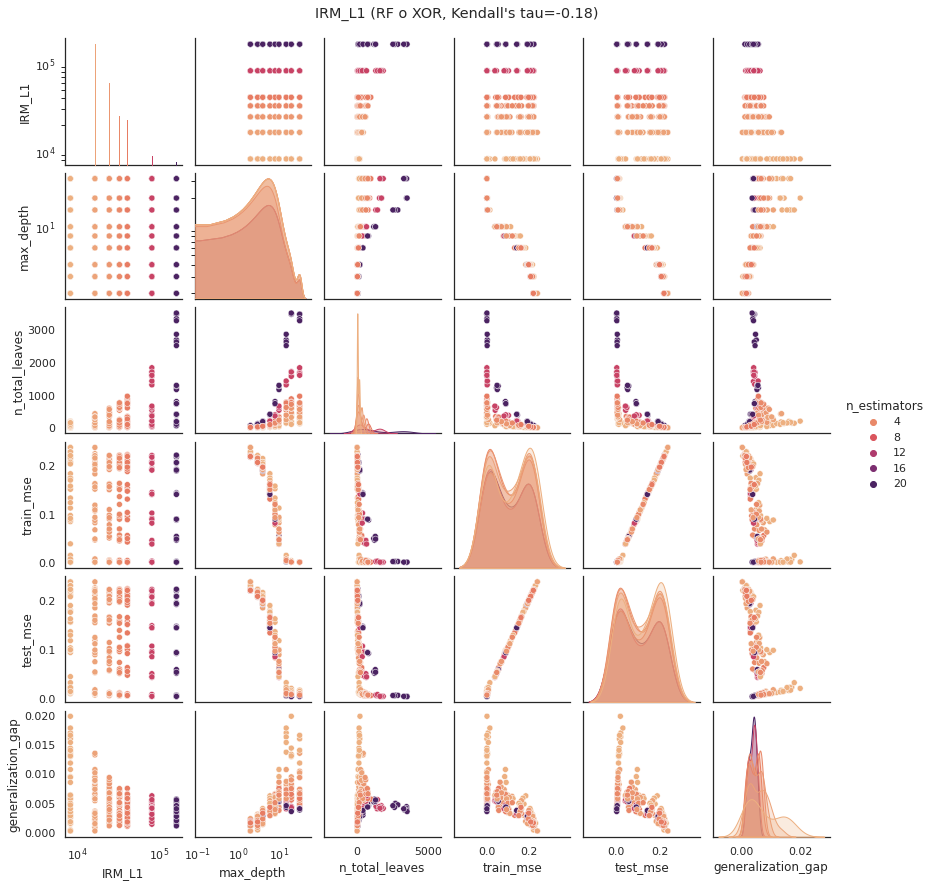

IRM_L2
##################################################


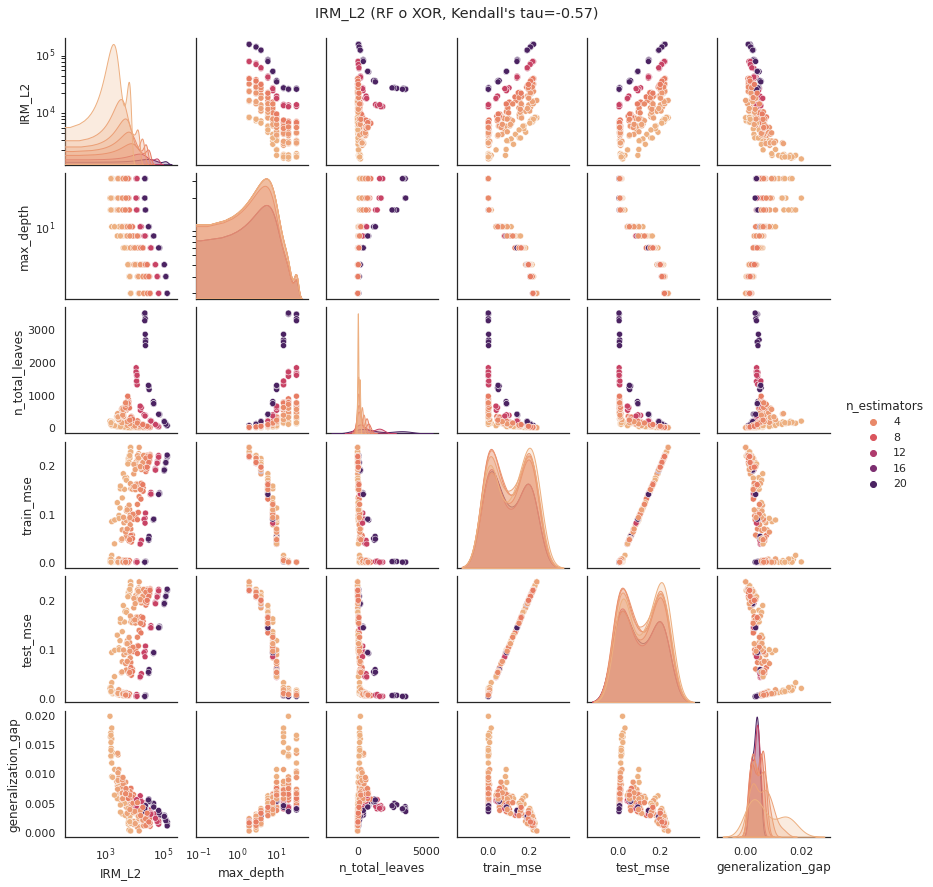

n_regions
##################################################


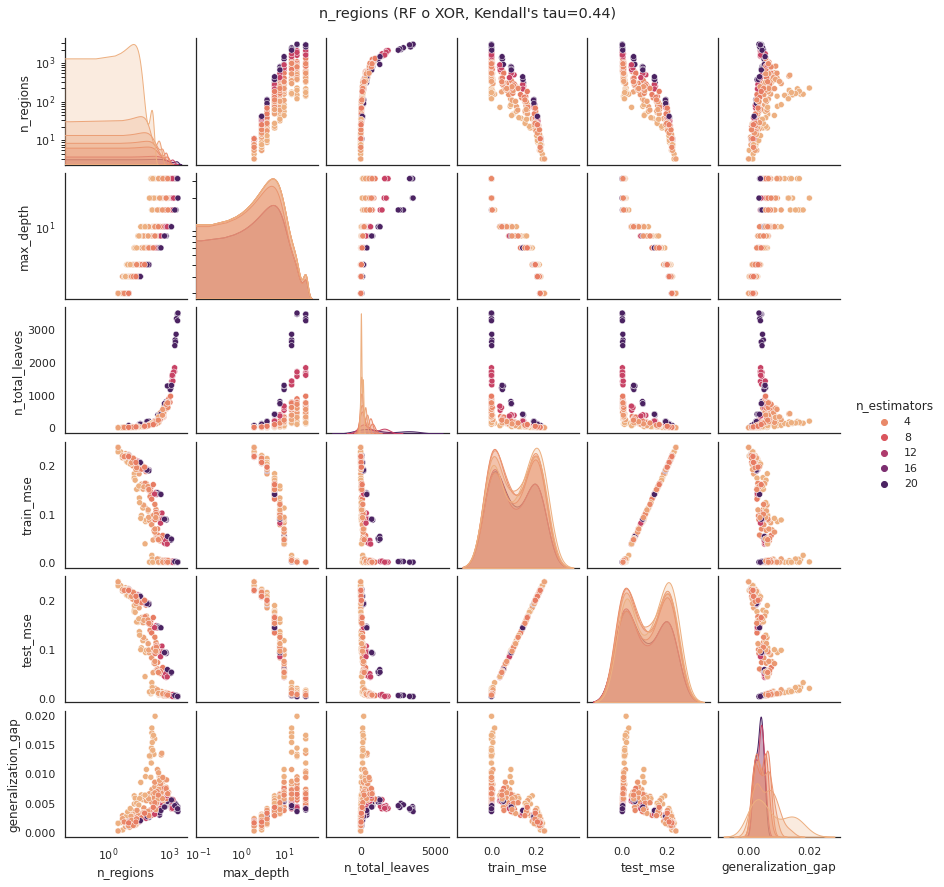

ACTS_L2
##################################################


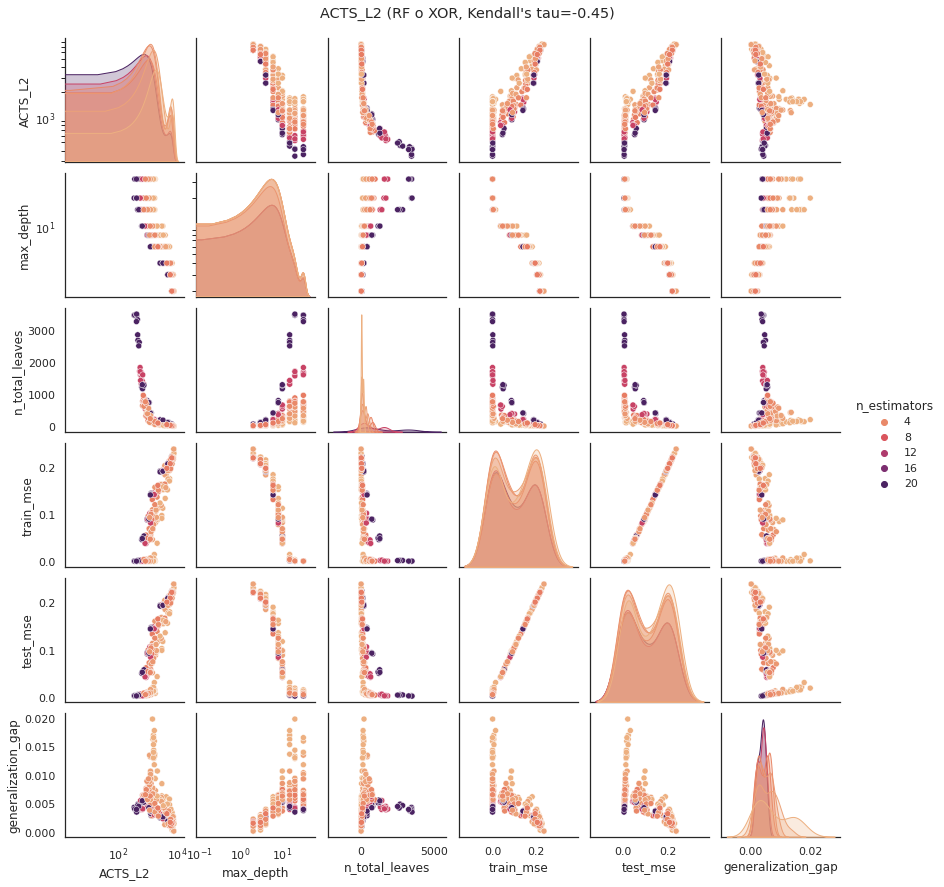

IRM_h*
##################################################


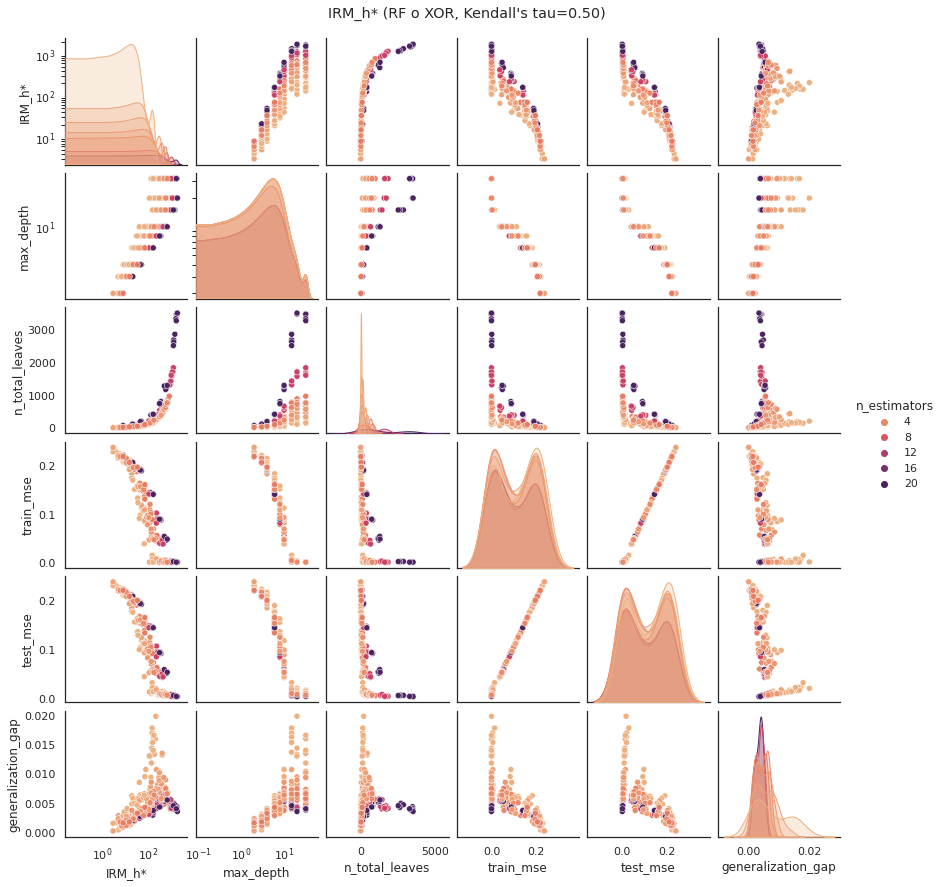

ACTS_h*
##################################################


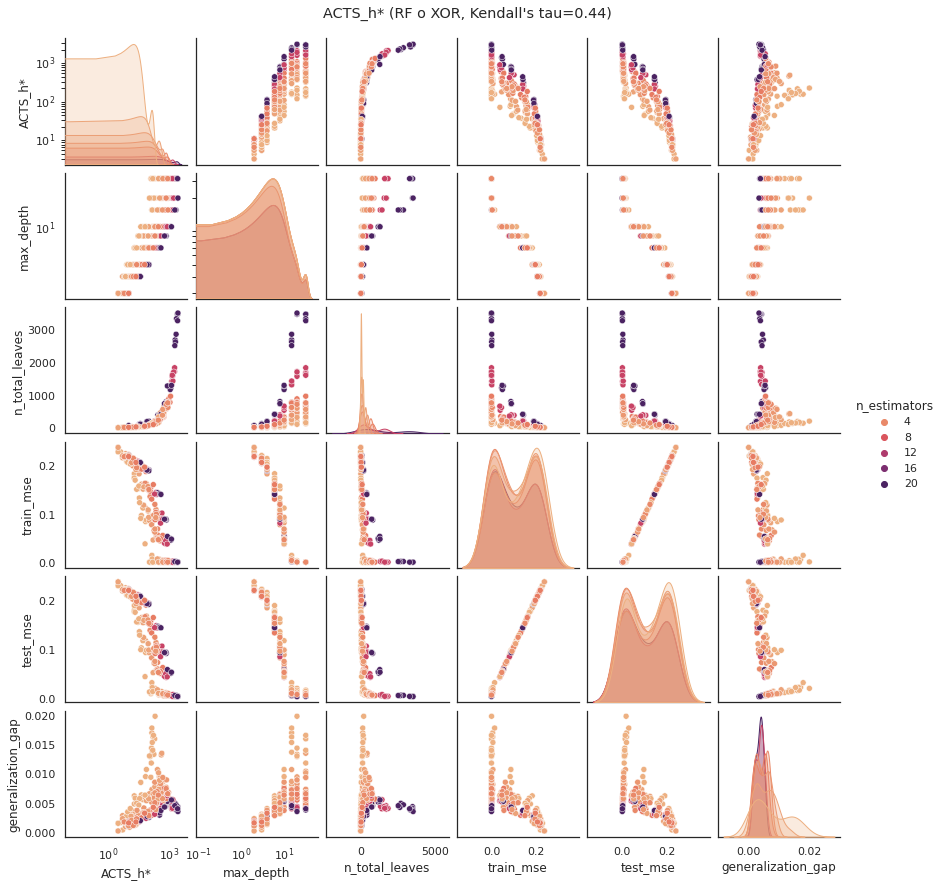

rows_mean_L2
##################################################


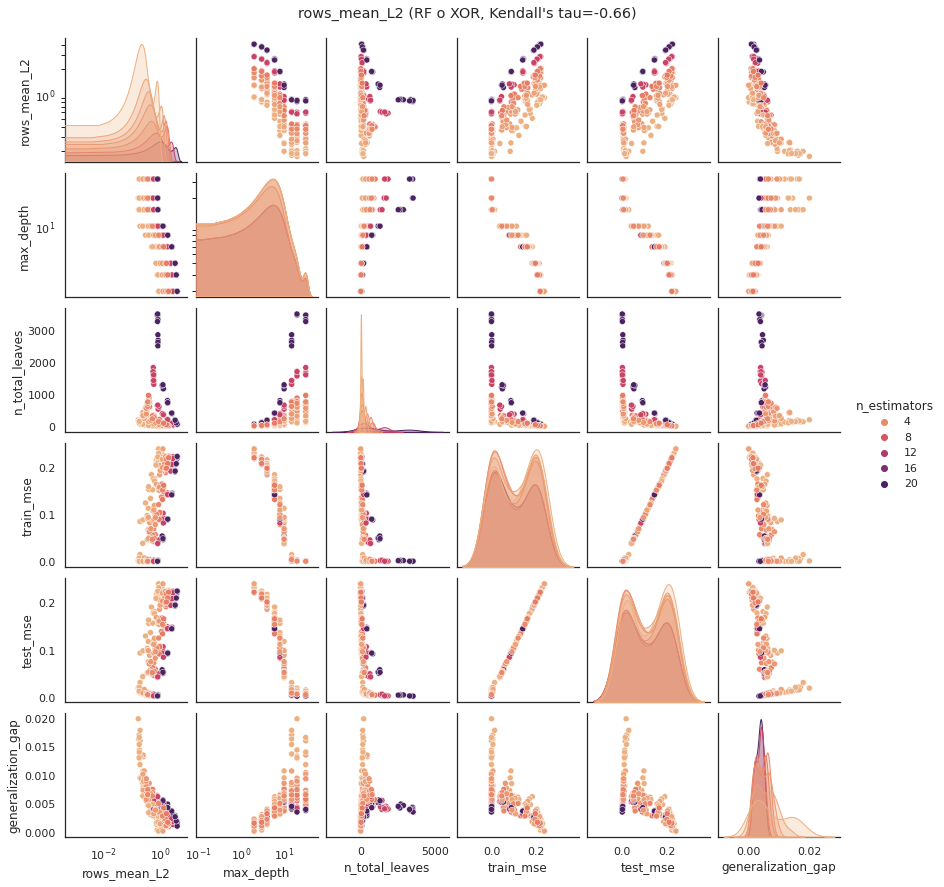

cols_mean_L1
##################################################


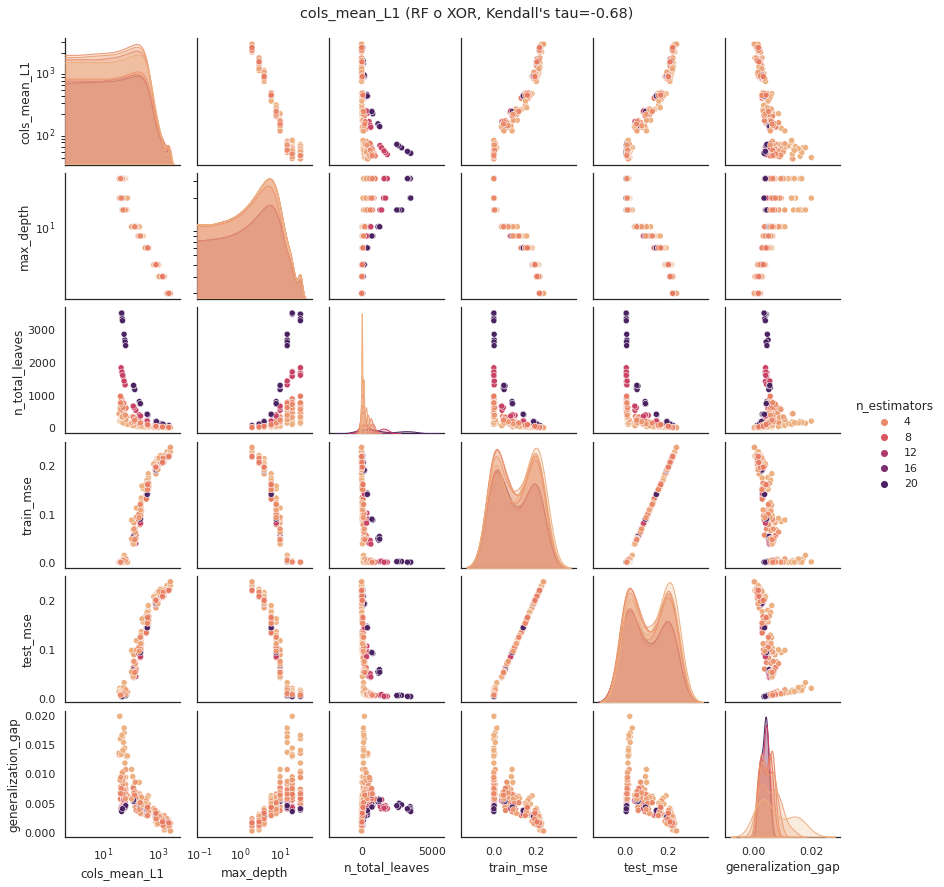

cols_mean_L2
##################################################


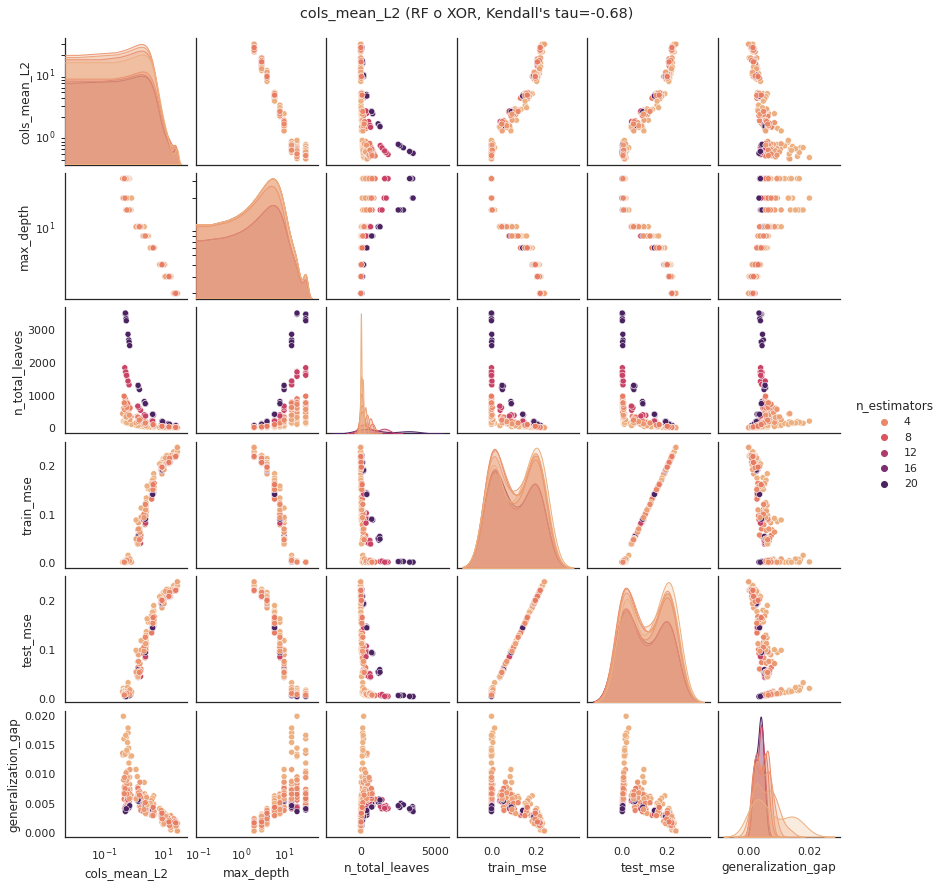

In [9]:
metrics = [
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', # 'entropy',
    # 'rows_mean_L1',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
hue = 'n_estimators'
for metric in metrics:
    print(metric)
    print('#'*50)
    corr, _ = kendalltau(df[metric], df['generalization_gap'])
    variables = [
        metric, 'max_depth', 'n_total_leaves', train_error, test_error, 'generalization_gap'
    ]
    g = sns.pairplot(
        df, vars=variables,
        hue=hue,
        palette='flare',
        height=2,
    )
    for ax in [0, 1]:
        g.axes[ax, 0].set_yscale('log')
        g.axes[0, ax].set_xscale('log')
    plt.suptitle(metric + f' (RF o XOR, Kendall\'s tau={corr:.2f})', y=1.02)
    # plt.savefig(f'./figures/rf_{metric}_pairplot.pdf')
    plt.show()

## Network

In [16]:
#
algo = "network"
dataset = "spiral"

# Read
df = pd.read_csv(f'./results/{dataset}/{dataset}_{algo}_results.csv')

# Define headers
train_error = 'train_mse'
test_error = 'test_mse'

# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
#     as_index=False
# ).mean()

df.head(5)

model  rep  n_train_samples  n_test_samples  hidden_layer_dims  n_epochs  \
0  network  0.0           1024.0          8192.0                4.0     100.0   
1  network  0.0           1024.0          8192.0                8.0     100.0   
2  network  0.0           1024.0          8192.0               16.0     100.0   
3  network  0.0           1024.0          8192.0               32.0     100.0   
4  network  0.0           1024.0          8192.0               64.0     100.0   

   learning_rate  batch_size  verbose  train_mse  ...  IRM_h*  ACTS_h*  \
0           0.01       128.0      0.0   0.234105  ...     3.0      5.0   
1           0.01       128.0      0.0   0.227756  ...     6.0     15.0   
2           0.01       128.0      0.0   0.217857  ...    11.0     36.0   
3           0.01       128.0      0.0   0.183299  ...    22.0    129.0   
4           0.01       128.0      0.0   0.137641  ...    27.0    206.0   

         entropy  rows_mean_L2  cols_mean_L1  cols_mean_L2  n_parameters  \
0   55776.981395      0.714771   2226.666667     29.272665          22.0   
1  210441.935621      1.497211   3728.166667     42.551603          42.0   
2  316075.774826      1.634073   3116.090909     35.944057          82.0   
3  926087.596001      2.868490   4061.727273     45.161601         162.0   
4  886613.974313      2.602168   3303.888889     36.927449         322.0   

   depth  width  generalization_gap  
0    1.0    4.0            0.005029  
1    1.0    8.0            0.007496  
2    1.0   16.0            0.008153  
3    1.0   32.0            0.013210  
4    1.0   64.0            0.014869  

[5 rows x 25 columns]

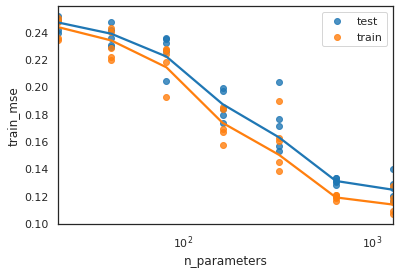

In [17]:
sns.set_style('white')
sns.set_context('notebook')

fig, ax = plt.subplots(1, 1, sharex=True)

sns.regplot(data=df, x='n_parameters', y=test_error, lowess=True, ax=ax, label='test')
sns.regplot(data=df, x='n_parameters', y=train_error, lowess=True, ax=ax, label='train')
plt.xscale('log')
plt.legend()
plt.show()

In [18]:
corr_vars = [
    'generalization_gap',
    'n_parameters', 'depth', 'width', 'n_epochs',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
# for hidden_layer_dims in df['hidden_layer_dims'].unique():
# print(hidden_layer_dims)
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
# corr_df.to_csv('./results/dn_spearman_corrs.csv')

generalization_gap  n_parameters  depth     width  \
generalization_gap            1.000000      0.635109    NaN  0.635109   
n_parameters                  0.635109      1.000000    NaN  1.000000   
depth                              NaN           NaN    NaN       NaN   
width                         0.635109      1.000000    NaN  1.000000   
n_epochs                           NaN           NaN    NaN       NaN   
IRM_L1                        0.652941      0.942055    NaN  0.942055   
IRM_L2                        0.695238      0.875573    NaN  0.875573   
n_regions                     0.628239      0.988164    NaN  0.988164   
ACTS_L2                      -0.602801     -0.968930    NaN -0.968930   
IRM_h*                        0.637988      0.988510    NaN  0.988510   
ACTS_h*                       0.628239      0.988164    NaN  0.988164   
entropy                       0.652381      0.936397    NaN  0.936397   
rows_mean_L2                  0.753782      0.827480    NaN  0.827480   
cols_mean_L1                 -0.012885     -0.414447    NaN -0.414447   
cols_mean_L2                 -0.191036     -0.632280    NaN -0.632280   

                    n_epochs    IRM_L1    IRM_L2  n_regions   ACTS_L2  \
generalization_gap       NaN  0.652941  0.695238   0.628239 -0.602801   
n_parameters             NaN  0.942055  0.875573   0.988164 -0.968930   
depth                    NaN       NaN       NaN        NaN       NaN   
width                    NaN  0.942055  0.875573   0.988164 -0.968930   
n_epochs                 NaN       NaN       NaN        NaN       NaN   
IRM_L1                   NaN  1.000000  0.976751   0.953915 -0.935294   
IRM_L2                   NaN  0.976751  1.000000   0.894103 -0.882913   
n_regions                NaN  0.953915  0.894103   1.000000 -0.977728   
ACTS_L2                  NaN -0.935294 -0.882913  -0.977728  1.000000   
IRM_h*                   NaN  0.960415  0.903104   0.996987 -0.976809   
ACTS_h*                  NaN  0.953915  0.894103   1.000000 -0.977728   
entropy                  NaN  0.998599  0.980952   0.949993 -0.931092   
rows_mean_L2             NaN  0.942297  0.985434   0.844936 -0.827731   
cols_mean_L1             NaN -0.199720 -0.074230  -0.407480  0.398319   
cols_mean_L2             NaN -0.431653 -0.298319  -0.627399  0.607003   

                      IRM_h*   ACTS_h*   entropy  rows_mean_L2  cols_mean_L1  \
generalization_gap  0.637988  0.628239  0.652381      0.753782     -0.012885   
n_parameters        0.988510  0.988164  0.936397      0.827480     -0.414447   
depth                    NaN       NaN       NaN           NaN           NaN   
width               0.988510  0.988164  0.936397      0.827480     -0.414447   
n_epochs                 NaN       NaN       NaN           NaN           NaN   
IRM_L1              0.960415  0.953915  0.998599      0.942297     -0.199720   
IRM_L2              0.903104  0.894103  0.980952      0.985434     -0.074230   
n_regions           0.996987  1.000000  0.949993      0.844936     -0.407480   
ACTS_L2            -0.976809 -0.977728 -0.931092     -0.827731      0.398319   
IRM_h*              1.000000  0.996987  0.956632      0.852939     -0.390808   
ACTS_h*             0.996987  1.000000  0.949993      0.844936     -0.407480   
entropy             0.956632  0.949993  1.000000      0.947619     -0.189636   
rows_mean_L2        0.852939  0.844936  0.947619      1.000000      0.004762   
cols_mean_L1       -0.390808 -0.407480 -0.189636      0.004762      1.000000   
cols_mean_L2       -0.615708 -0.627399 -0.420728     -0.216807      0.923249   

                    cols_mean_L2  
generalization_gap     -0.191036  
n_parameters           -0.632280  
depth                        NaN  
width                  -0.632280  
n_epochs                     NaN  
IRM_L1                 -0.431653  
IRM_L2                 -0.298319  
n_regions              -0.627399  
ACTS_L2                 0.607003  
IRM_h*                 -0.615708  
ACTS_h*         

IRM_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

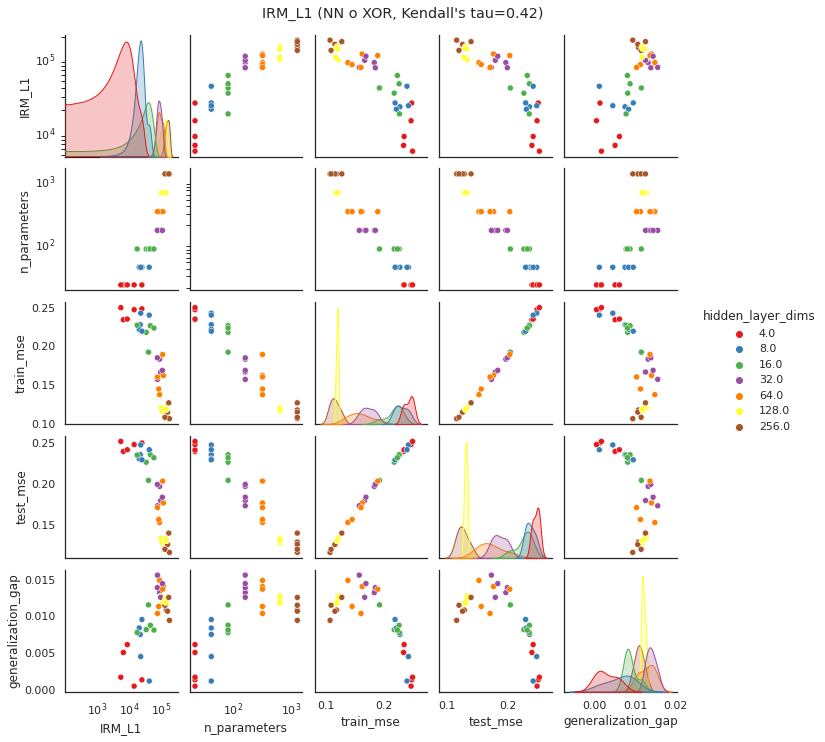

IRM_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

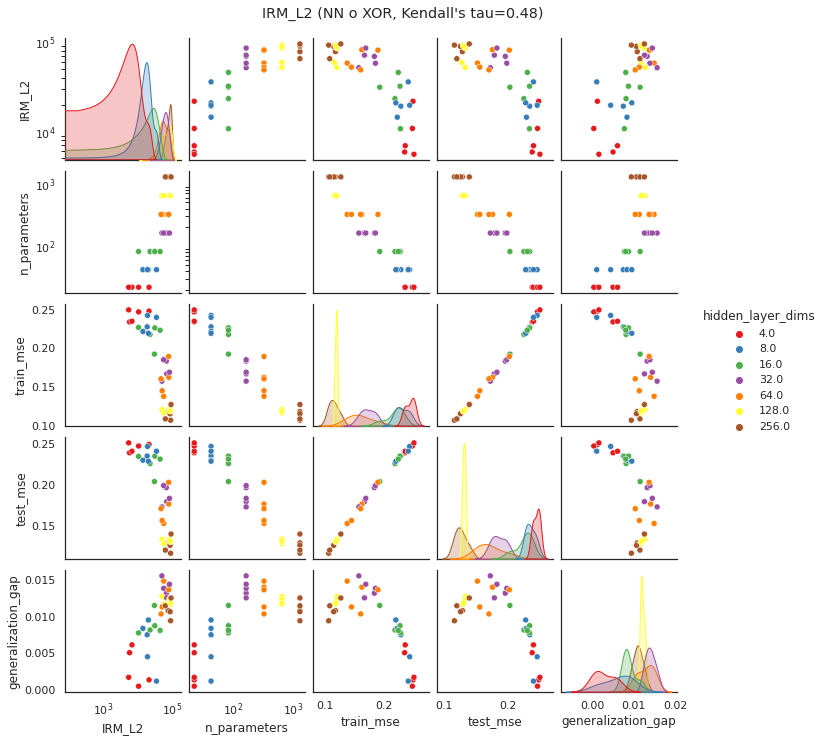

n_regions
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

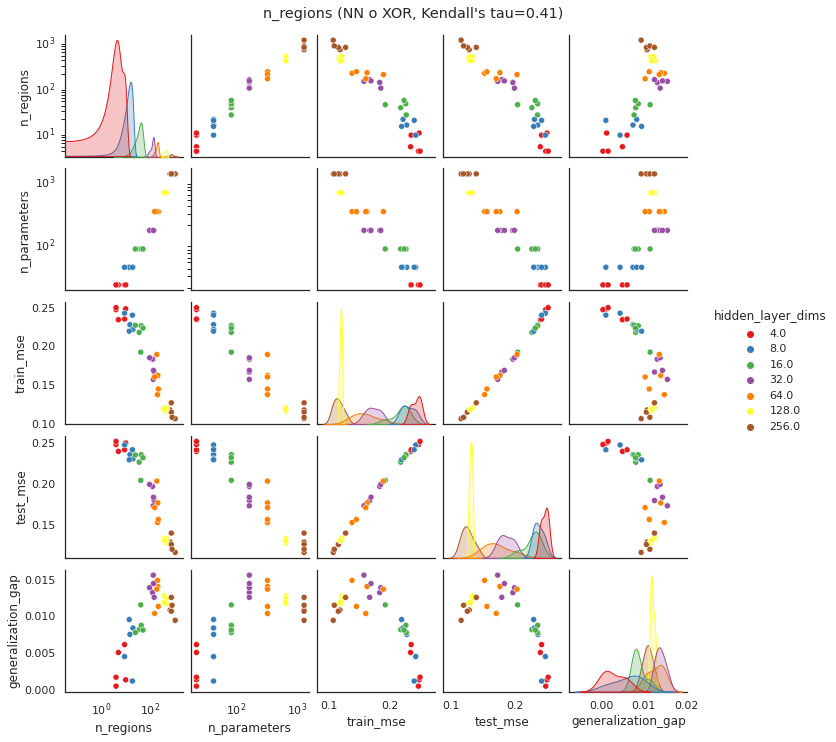

ACTS_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

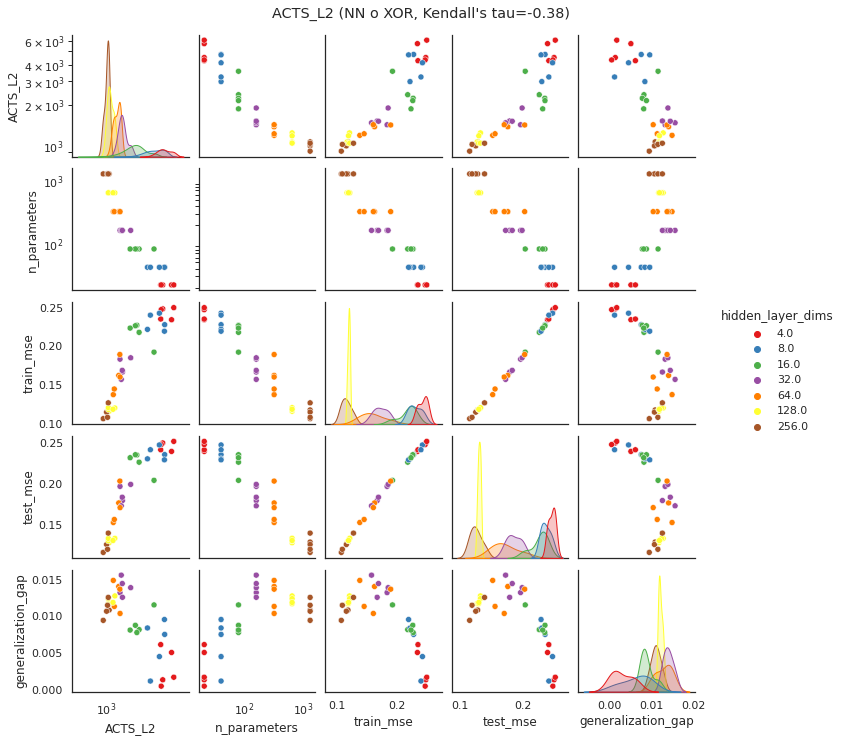

IRM_h*
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

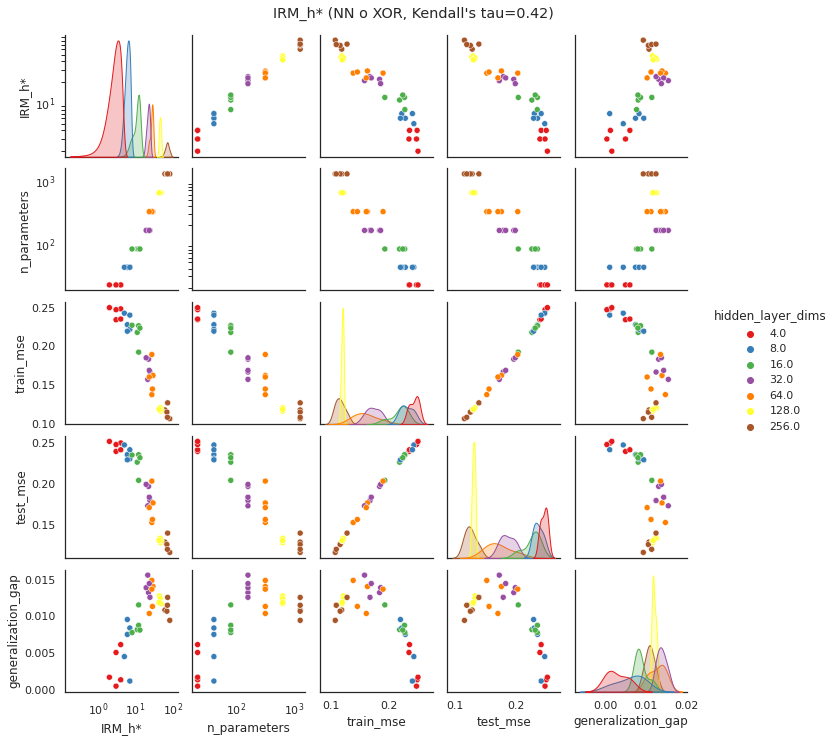

ACTS_h*
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

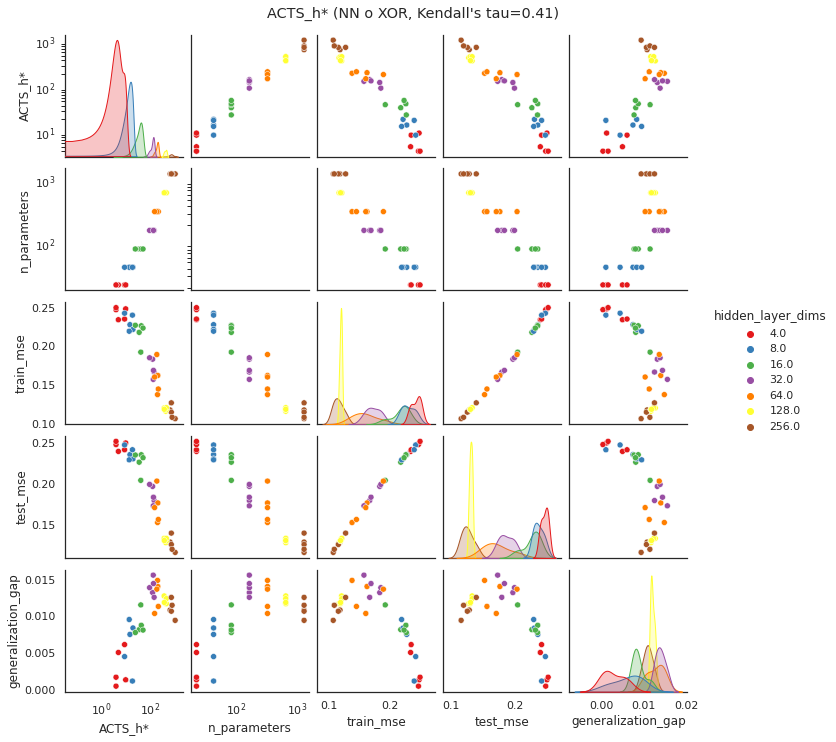

rows_mean_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

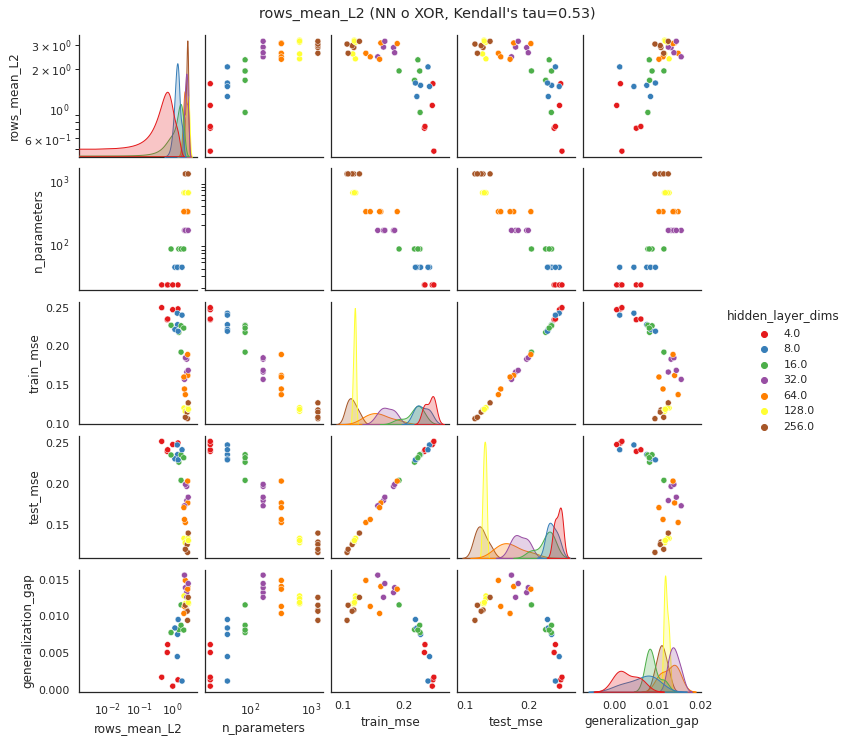

cols_mean_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

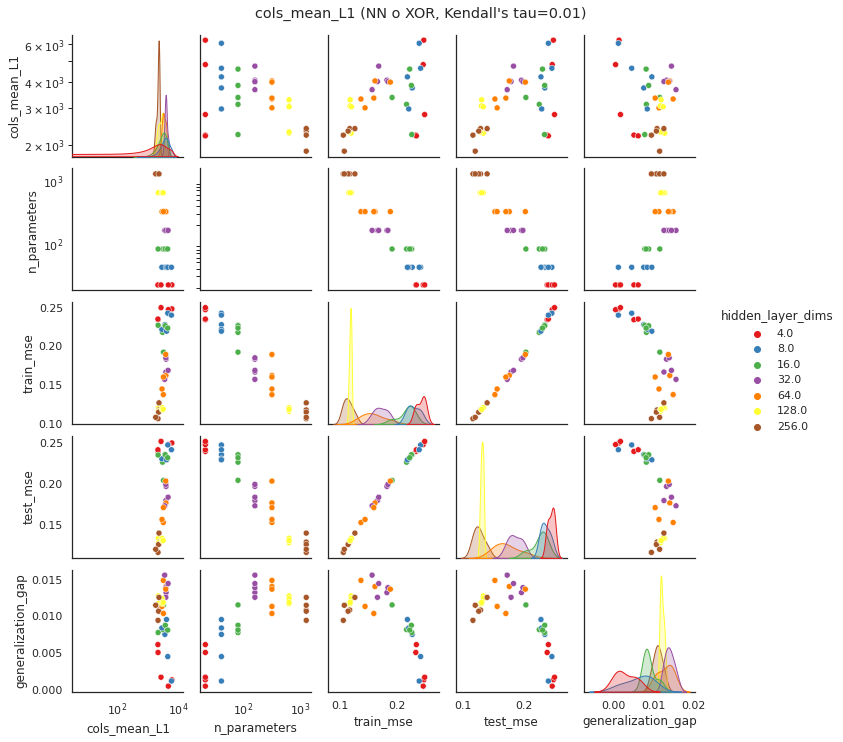

cols_mean_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

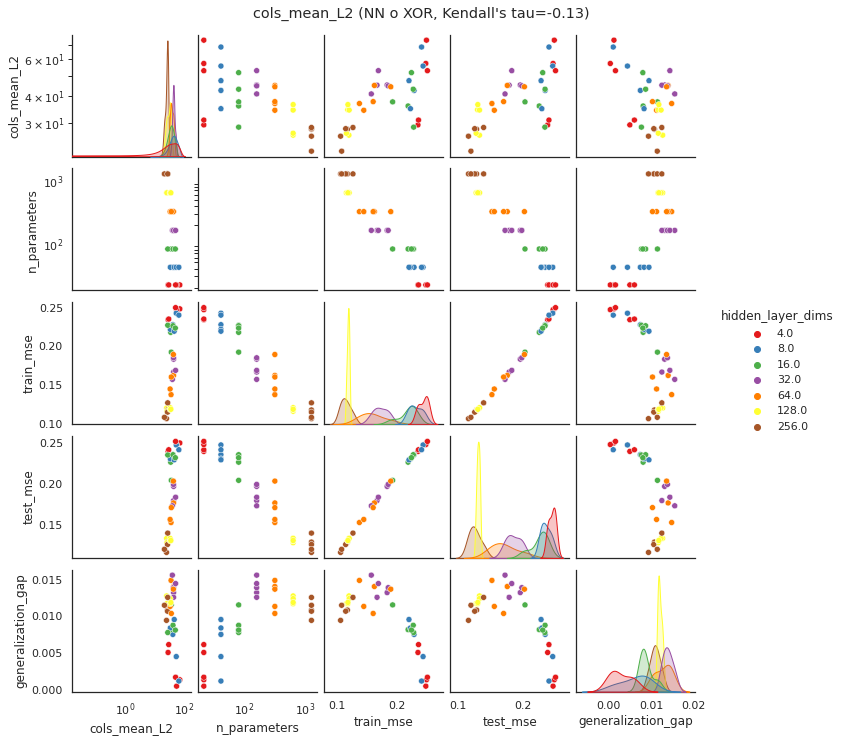

In [19]:
metrics = [
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', # 'entropy',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
hue = 'hidden_layer_dims'
for metric in metrics:
    print(metric)
    print('#'*50)
    corr, _ = kendalltau(df[metric], df['generalization_gap'])
    variables = [
        metric, 'n_parameters', train_error, test_error, 'generalization_gap'
    ]
    g = sns.pairplot(
        df, vars=variables,
        hue=hue,
        palette='Set1',
        height=2,
    )
    for ax in [0, 1]:
        g.axes[ax, 0].set_yscale('log')
        g.axes[0, ax].set_xscale('log')
    plt.suptitle(metric + f' (NN o XOR, Kendall\'s tau={corr:.2f})', y=1.02)
    # plt.savefig(f'./figures/df_{metric}_pairplot.pdf')
    plt.show()